In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

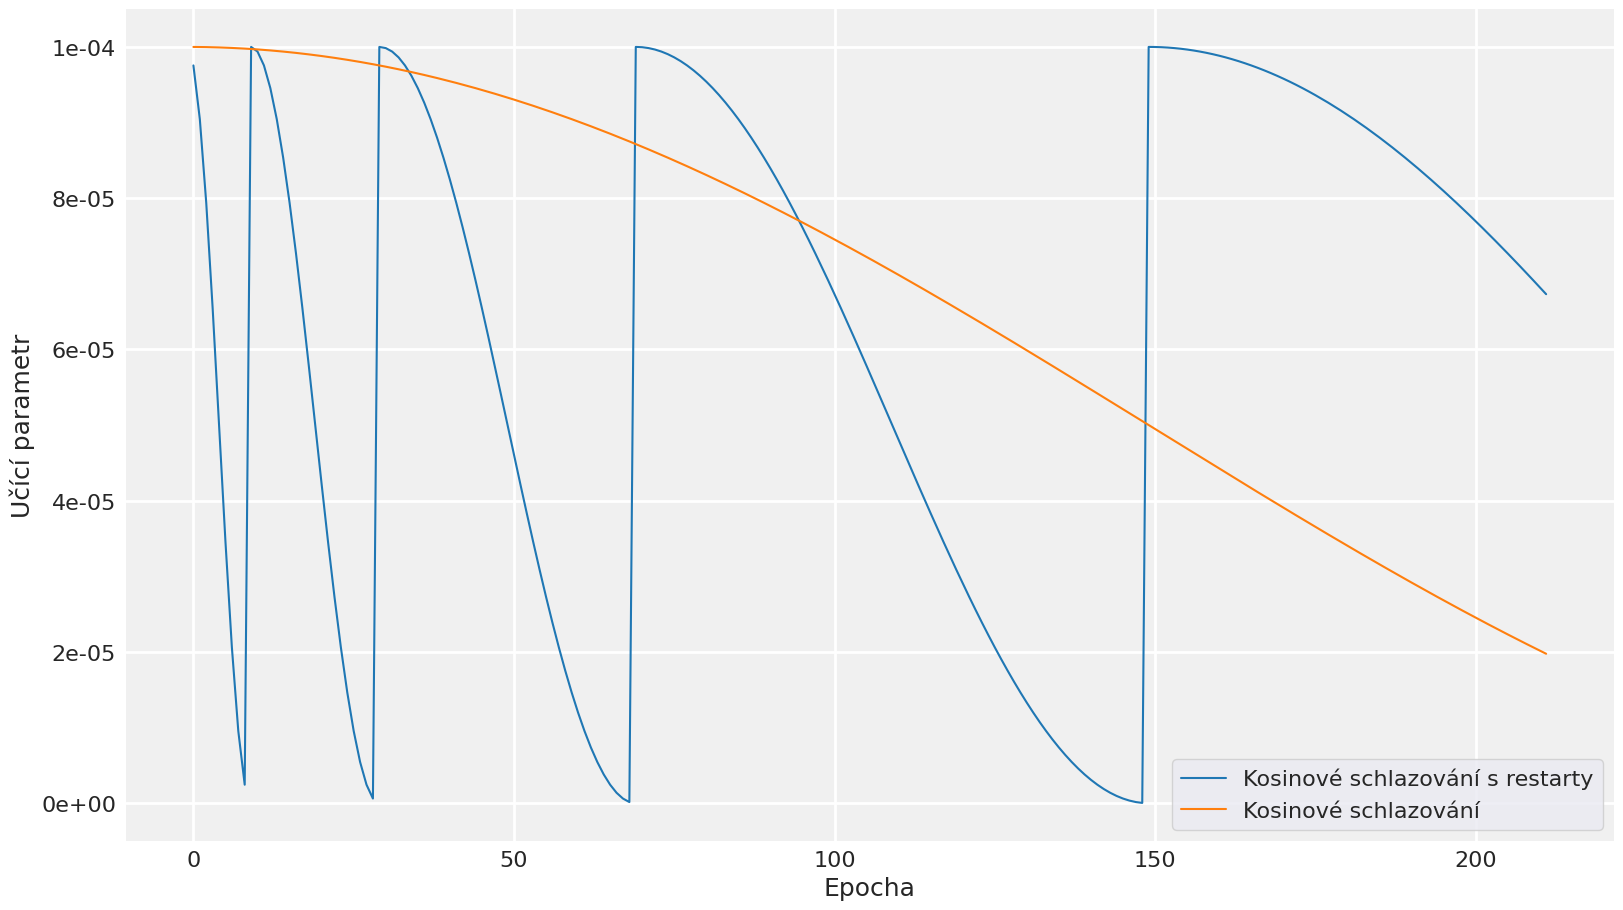

In [15]:
data1 = pd.read_csv('data/train_epoch_lr_cosine_annealing.csv', header=None).drop(columns=[1])
data2 = pd.read_csv('data/train_epoch_lr_cosine_annealing_restart.csv', header=None).drop(columns=[1])
data = pd.merge(data1, data2, on=0)

# Create the line plot
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(19.20, 10.80))
sns.lineplot(x=0, y="2_x", data=data, label='Kosinové schlazování s restarty')
sns.lineplot(x=0, y='2_y', data=data, label='Kosinové schlazování')

# Customize the plot
plt.xlabel('Epocha', fontsize=18)
plt.ylabel('Učící parametr', fontsize=18)
plt.legend()

# Show the plot
# Show grid lines in white
plt.grid(True, color='white', linestyle='-', linewidth=2)
plt.gca().set_facecolor('#f0f0f0')

# Format y-axis in 1e-4 style
formatter = FuncFormatter(lambda y, _: f'{y:.0e}')
plt.gca().yaxis.set_major_formatter(formatter)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.savefig('img/cosine_annealing.png', bbox_inches='tight')
plt.show()

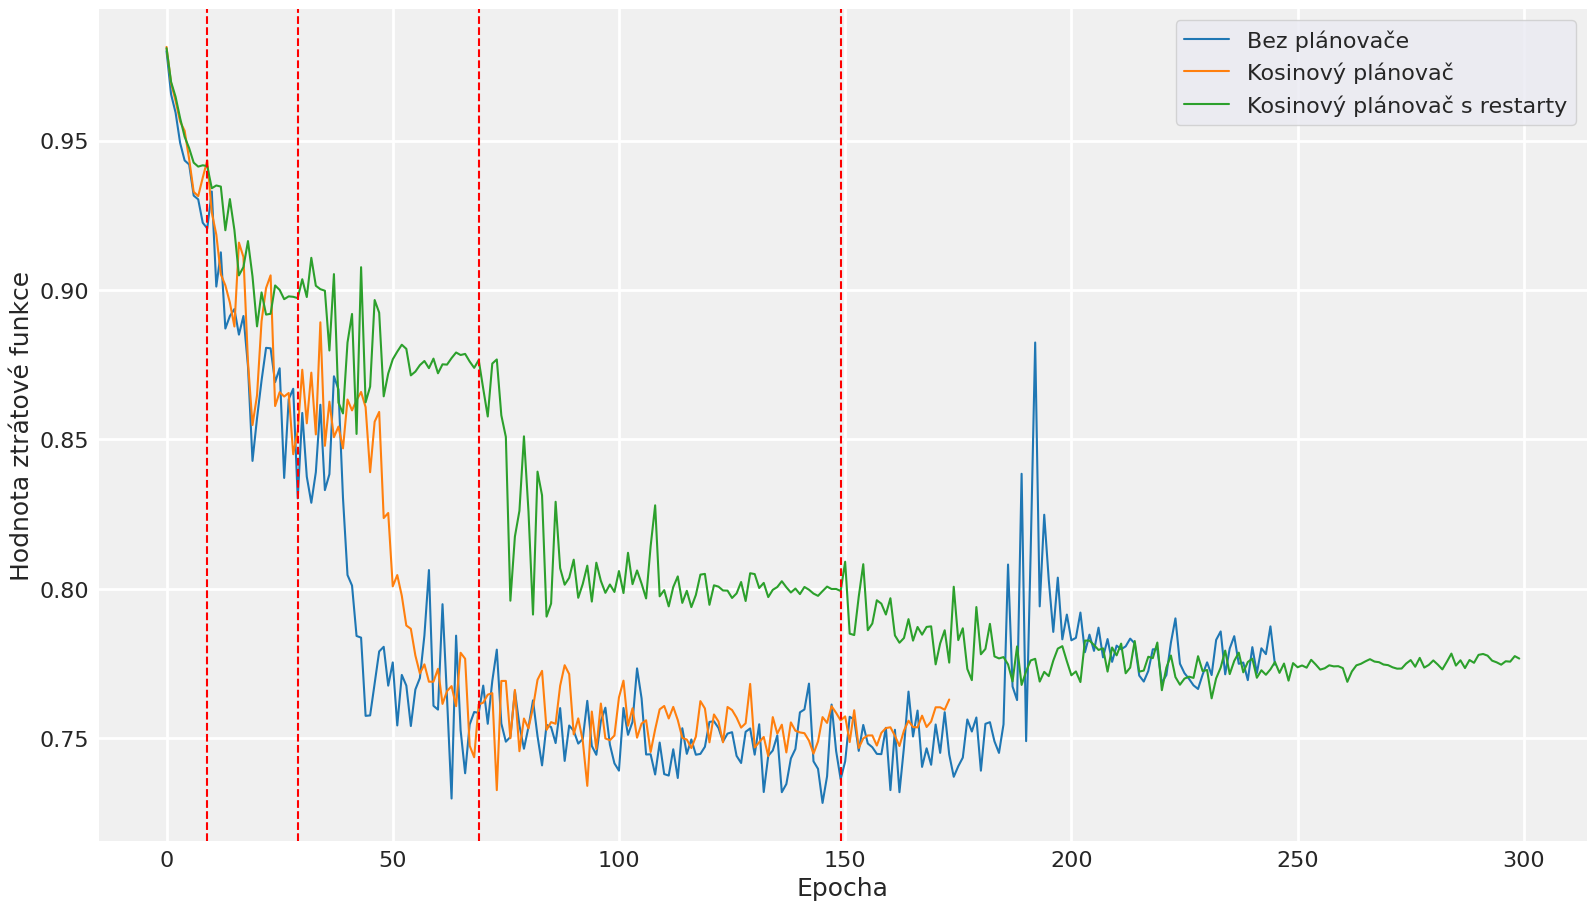

In [17]:
data_orig = pd.read_csv('data/orig_deeplab__val_epoch_loss.csv', header=None).drop(columns=[1])
data_ca = pd.read_csv('data/ca_deeplab__val_epoch_loss.csv', header=None).drop(columns=[1])
data_ca_restart = pd.read_csv('data/ca_restart_deeplab__val_epoch_loss.csv', header=None).drop(columns=[1])
data = data_orig.merge(data_ca, on=0, how='outer').merge(data_ca_restart, on=0, how='outer')

# Create the line plot
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(19.20, 10.80))
sns.lineplot(x=0, y="2_x", data=data, label='Bez plánovače')
sns.lineplot(x=0, y='2_y', data=data, label='Kosinový plánovač')
sns.lineplot(x=0, y=2, data=data, label='Kosinový plánovač s restarty')

plt.axvline(x=9, color='red', linestyle='--')
plt.axvline(x=29, color='red', linestyle='--')
plt.axvline(x=69, color='red', linestyle='--')
plt.axvline(x=149, color='red', linestyle='--')

# Customize the plot
plt.xlabel('Epocha', fontsize=18)
plt.ylabel('Hodnota ztrátové funkce', fontsize=18)
plt.legend()

# Show the plot
# Show grid lines in white
plt.grid(True, color='white', linestyle='-', linewidth=2)
plt.gca().set_facecolor('#f0f0f0')

# Format y-axis in 1e-4 style
# formatter = FuncFormatter(lambda y, _: f'{y:.0e}')
# plt.gca().yaxis.set_major_formatter(formatter)

sns.despine(top=True, right=True, left=True, bottom=True)
plt.savefig('img/cosine_annealing_impact.png', bbox_inches='tight')
plt.show()